BIG DATA PROJECT

SOLAR RADIATION PREDICTION

DIVISON 4

21BCP258,21BCP255,21BCP264

In [1]:
!unzip /content/drive/MyDrive/dataset/archive.zip

Archive:  /content/drive/MyDrive/dataset/archive.zip
  inflating: SolarPrediction.csv     


In [2]:
import pandas as pd
df=pd.read_csv("/content/SolarPrediction.csv")

In [ ]:
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


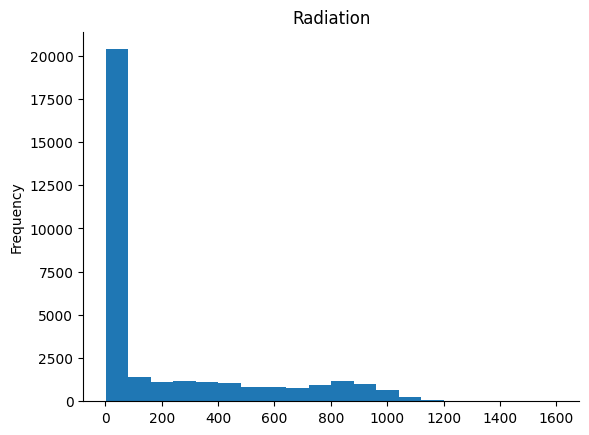

In [ ]:
from matplotlib import pyplot as plt
df['Radiation'].plot(kind='hist', bins=20, title='Radiation')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.shape

(32686, 11)

In [ ]:
df.corr()

<ipython-input-72-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
UNIXTime,1.000000,-0.081286,-0.369169,-0.332016,-0.063117,0.152613,0.173860
Radiation,-0.081286,1.000000,0.734955,0.119016,-0.226171,-0.230324,0.073627
Temperature,-0.369169,0.734955,1.000000,0.311173,-0.285055,-0.259421,-0.031458
Pressure,-0.332016,0.119016,0.311173,1.000000,-0.223973,-0.229010,-0.083639
Humidity,-0.063117,-0.226171,-0.285055,-0.223973,1.000000,-0.001833,-0.211624
WindDirection(Degrees),0.152613,-0.230324,-0.259421,-0.229010,-0.001833,1.000000,0.073092
Speed,0.173860,0.073627,-0.031458,-0.083639,-0.211624,0.073092,1.000000


In [ ]:
df['TimeSunSet']=df['TimeSunSet'].apply(lambda x:(x).split(":")[0])
df['TimeSunSet(in Hrs)']=df['TimeSunSet']
df['TimeSunRise(in Hrs)']=df['TimeSunRise'].apply(lambda x:(x).split(":")[0])
df['TimeSunSet(in Hrs)']=df['TimeSunSet(in Hrs)'].apply(lambda x:int(x))
df['TimeSunRise(in Hrs)']=df['TimeSunRise(in Hrs)'].apply(lambda x:int(x))
df['Month']=df['Data'].apply(lambda x:(x).split("/")[0])
df['Day']=df['Data'].apply(lambda x:(x).split("/")[1])
df['Month']=df['Month'].apply(lambda x:int(x))
df['Day']=df['Day'].apply(lambda x:int(x))
df['Time_Hrs']=df['Time'].apply(lambda x:(x).split(":")[0])
df['Time_Mins']=df['Time'].apply(lambda x:(x).split(":")[1])
df['Time_Secs']=df['Time'].apply(lambda x:(x).split(":")[2])
df['Time_Mins']=df['Time_Mins'].apply(lambda x:int(x))
df['Time_Secs']=df['Time_Secs'].apply(lambda x:int(x))

In [ ]:
df

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,TimeSunSet(in Hrs),TimeSunRise(in Hrs),Month,Day,Time_Hrs,Time_Mins,Time_Secs
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18,18,6,9,29,23,55,26
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18,18,6,9,29,23,50,23
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18,18,6,9,29,23,45,26
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18,18,6,9,29,23,40,21
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18,18,6,9,29,23,35,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32681,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17,17,6,12,1,00,20,4
32682,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17,17,6,12,1,00,15,1
32683,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17,17,6,12,1,00,10,1
32684,1480586702,12/1/2016 12:00:00 AM,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17,17,6,12,1,00,5,2


In [ ]:
X=df.drop(['Data','Time','TimeSunRise','TimeSunSet','Radiation'],axis=1)
y=df['Radiation']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.30, random_state=101)
X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size=0.30, random_state=101)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_val=scaler.fit_transform(X_val)
X_test=scaler.transform(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
X_train.shape

(22880, 13)

In [ ]:
y_test.shape

(2942,)

In [ ]:
import numpy as np
from sklearn.metrics import r2_score
def report(model):
  preds = model.predict(X_val)
  MSE=mean_squared_error(preds,y_val)
  print('Mean Squared Error: '+str(MSE))
  print(r2_score(preds,y_val))
  return preds

In [ ]:
preds_lin=report(linear_model)

Mean Squared Error: 37825.589700398814
0.3981136166353396


In [ ]:
from sklearn.ensemble import RandomForestRegressor
RandomForest_model=RandomForestRegressor()
RandomForest_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
preds_ran=report(RandomForest_model)

Mean Squared Error: 7533.885086424733
0.9202261260081941


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 64)                896       
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/100
715/715 [==============================] - 3s 3ms/step - loss: 74622.2109 - val_loss: 37876.2070
Epoch 2/100
715/715 [==============================] - 2s 2ms/step - loss: 31448.4414 - val_loss: 30215.3027
Epoch 3/100
715/715 [==============================] - 2s 3ms/step - loss: 28837.2754 - val_loss: 29428.6836
Epoch 4/100
715/715 [==============================] - 2s 3ms/step - loss: 27447.2500 - val_loss: 27549.7852
Epoch 5/100
715/715 [==============================] - 2s 2ms/step - loss: 25443.8457 - val_loss: 25096.7793
Epoch 6/100
715/715 [==============================] - 2s 2ms/step - loss: 23149.8398 - val_loss: 22668.9551
Epoch 7/100
715/715 [==============================] - 2s 2ms/step - loss: 21006.4473 - val_loss: 20929.1406
Epoch 8/100
715/715 [==============================] - 1s 2ms/step - loss: 19401.9180 - val_loss: 19574.0508
Epoch 9/100
715/715 [==============================] - 2s 2ms/step - loss: 18248.3145 - val_loss: 18398.7988
Epoch 10/100
715/71

In [ ]:
preds_ann=report(model)

215/215 [==============================] - 0s 1ms/step
Mean Squared Error: 9985.939558865119
0.8927541935045635


In [ ]:
from keras.layers import LSTM
model1 = Sequential()
model1.add(LSTM(50, input_shape=(1,13)))
model1.add(Dense(1))

In [ ]:
X_train_lstm = X_train.reshape(-1, 1, 13)

In [ ]:
model1.compile(loss='mse', optimizer='adam')
model1.fit(X_train_lstm, y_train, epochs=100, batch_size=32)

Epoch 1/100
715/715 [==============================] - 8s 6ms/step - loss: 136133.7344
Epoch 2/100
715/715 [==============================] - 2s 2ms/step - loss: 123304.4141
Epoch 3/100
715/715 [==============================] - 2s 3ms/step - loss: 111707.0078
Epoch 4/100
715/715 [==============================] - 2s 3ms/step - loss: 101854.2109
Epoch 5/100
715/715 [==============================] - 2s 3ms/step - loss: 93528.8594
Epoch 6/100
715/715 [==============================] - 2s 3ms/step - loss: 86093.3047
Epoch 7/100
715/715 [==============================] - 3s 4ms/step - loss: 79332.6406
Epoch 8/100
715/715 [==============================] - 2s 3ms/step - loss: 73126.8984
Epoch 9/100
715/715 [==============================] - 2s 3ms/step - loss: 67376.6016
Epoch 10/100
715/715 [==============================] - 2s 3ms/step - loss: 62086.6250
Epoch 11/100
715/715 [==============================] - 2s 3ms/step - loss: 57186.9805
Epoch 12/100
715/715 [==========================

In [ ]:
X_val_lstm = X_val.reshape(-1, 1, 13)
preds = model.predict(X_val_lstm)
preds_lstm = preds.reshape(-1, 1)
MSE=mean_squared_error(preds_lstm,y_val)
print('Mean Squared Error: '+str(MSE))
print(r2_score(preds_lstm,y_val))

215/215 [==============================] - 1s 6ms/step
Mean Squared Error: 9985.939582751529
0.8927541890295544


In [ ]:
import xgboost as xgb

xgb = xgb.XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
preds_xg=report(xgb)

Mean Squared Error: 16641.843807916317
0.8133436237531182


In [ ]:
print(preds_ann.shape)
print(preds_ran.shape)
print(preds_lin.shape)
print(preds_lstm.shape)
print(preds_xg.shape)

(6864, 1)
(6864,)
(6864,)
(6864, 1)
(6864,)


In [ ]:
preds_ann=preds_ann.reshape(-1)
preds_lstm=preds_lstm.reshape(-1)
ensem_total=preds_ann+preds_ran+preds_lin+preds_xg+preds_lstm
ensem_total=ensem_total/5
print(ensem_total.shape)
MSE=mean_squared_error(ensem_total,y_val)
print('Mean Squared Error: '+str(MSE))
print(r2_score(ensem_total,y_val))

(6864,)
Mean Squared Error: 8884.182480660565
0.9016431638546092
